In [93]:
import pandas as pd
import numpy as np
import os
os.chdir('D:/DataSet')
import sys
sys.path.append('D:/gitln/WorkCode/BaseFunc/')

In [104]:
df = pd.read_csv('total_amt_3.csv',encoding='gbk')
df['report_date'] = pd.to_datetime(df['report_date'],format='%Y/%m/%d')
df.set_index('report_date', inplace=True)

In [95]:
train = df.loc[:'2014-08-30',:].copy()
test = df.loc['2014-09-01':,:].copy()
purchase = train.pop('total_purchase_amt')
redeem = train.pop('total_redeem_amt')
test = test.drop(['total_purchase_amt', 'total_redeem_amt'], axis=1)

In [96]:
# 通过与目标的相关系数去除特则，相关系数小于0.1
purdelete=['赎回是否在1浪','赎回是否在3浪', '赎回是否在5浪','休假前正常上班的一天',
           '是否月中','上班最后天后要放2天假（2-3,7 3个01特征）',
 '上班最后天后要放3天假（2-3,7 3个01特征）','周日补班','工作日','上班前一天休假']
purtrain = train.drop(purdelete, axis=1)
purtest = test.drop(purdelete, axis=1)

In [97]:
# 通过与目标的相关系数去除特则，相关系数小于0.1
# 去除掉特则之前相关系数位1或-1的特征，保留其中一个。
reddelete=['赎回是否在1浪', '赎回是否在5浪','周日补班',
           '上班第一天前放了2天假（2-3 2个01特征）',
          '赎回上一个波谷是几天前','每月第一天','休假前正常上班的一天','工作日',
          '上班前一天休假']
redtrain = train.drop(reddelete, axis=1)
redtest = test.drop(reddelete, axis=1)

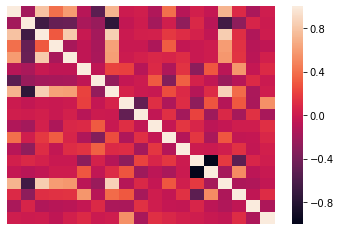

In [26]:
import seaborn as sns
%matplotlib inline
sns.heatmap(redtrain.fillna(0).corr(),xticklabels=False,yticklabels=False)

In [98]:
from sklearn import linear_model as lm
model = lm.LinearRegression()
model = model.fit(purtrain.fillna(0), purchase)
pur = model.predict(purtest.fillna(0))
model1 = lm.LinearRegression()
model1 = model1.fit(redtrain.fillna(0), redeem)
red = model1.predict(redtest.fillna(0))

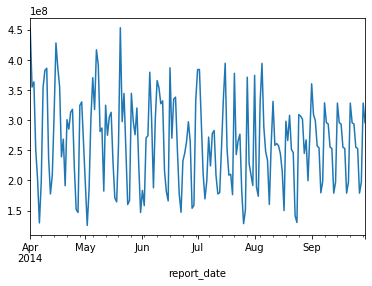

In [105]:
pd.Series(df['total_purchase_amt']).plot()

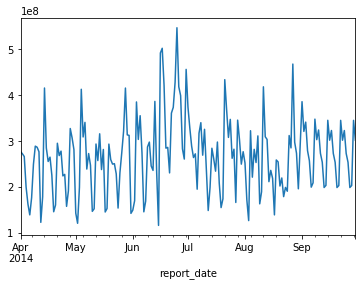

In [106]:
pd.Series(df['total_redeem_amt']).plot()

In [101]:
def to_result(purchase, redeem):
    report_date=list(range(20140901,20140931))
    sub=pd.DataFrame()
    sub['purchase']=purchase*1.01
    sub['redeem']=redeem
    sub=sub.reset_index()
    sub['index']=report_date
    sub=sub.rename(columns={'index':'report_date'})
    sub[['purchase','redeem']]=sub[['purchase','redeem']].astype(np.int64)
    sub=sub.set_index(['report_date'])
    sub.to_csv('tc_comp_predict_table5.csv',sep=',')
    
to_result(pur, red)

In [53]:
import purchase.PurchaseFeatures as pfeature
import purchase.PurchaseBase as pbase

In [50]:
base = pd.read_csv('./PRD/base.csv')
base['date'] = pd.to_datetime(base['date'], format='%Y%m%d')
base1 = base.set_index('date')

In [55]:
balance1 = pbase.add_timestamp(base,time_index='date')
features = pfeature.extract_is_feature(balance1)

In [58]:
feature1 = features.loc[:,'day':]

In [64]:
feature1.index=features['date']

In [75]:
basepur = feature1.drop(purdel, axis=1)
basered = feature1.drop(reddel, axis=1)

In [74]:
purdel=['year','is_firstday_of_work','is_lastday_of_workday','is_work_on_sunday',
'is_secday_of_month','is_midmonth','is_first_week','is_fourth_week','weekday']

reddel = ['month','year','is_worked_yestday','is_lastday_of_workday',
'is_firstday_of_month','is_first_week','is_second_week','is_third_week',
'is_fourth_week', 'weekday']

In [86]:
purtrain = purtrain.join(basepur)
purtest = purtest.join(basepur)
redtrain = redtrain.join(basered)
redtest = redtest.join(basered)

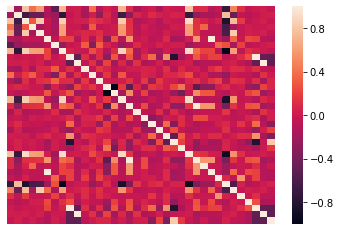

In [85]:
sns.heatmap(re1.fillna(0).corr(),xticklabels=False,yticklabels=False)

In [83]:
re.fillna(0).corrwith(re.iloc[:,-13])[-15:-10]

day           0.200243
month         0.978688
week          1.000000
is_weekend   -0.024456
is_holiday   -0.251133
dtype: float64

In [1]:
import pandas as pd

In [12]:
df = pd.Series([1,2,3,4,5,''])

In [13]:
df.astype('str').str.findall('^\s*$')

0    []
1    []
2    []
3    []
4    []
5    []
dtype: object